## Desk calculator project:

The task is to build a quantum circuit that performs the difference between the binary reprentations
of two positive integers. The circuit can be defined as a variation of the quantum adder explained
in class and using the Quantum Fourier Transform.
The circuit must be implemented in Qiskit and demonstrated on a one or two instances.
The project can be extended with the implementation of a complete desk calculator

In [16]:
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister
import qiskit
import numpy as np

## Adder:

In [2]:
# we want to add two positive integer number on a quantum computer
# With the classical computation (on our CPU we have):
a = 1
b = 2

a+b

3

### Toffoli approach

In [3]:
# we first create a quantum circuit:
# we create 6 qubits (a0,a1,a2,b1,b2,b3) and a register c where we'll store the result

def set_input_state(a, b):
    get_binary = lambda x : '{0:{fill}3b}'.format(x, fill='0') # this function transforms digit numbers into binary numbers
    
    r_a = QuantumRegister(3,'a')
    r_b = QuantumRegister(3,'b')
    cr = ClassicalRegister(3,'c')
    qc = QuantumCircuit(r_a, r_b, cr)
    
    a_binary = get_binary(a)
    b_binary = get_binary(b)
    
    for i in range(3):
        if a_binary[i] == '1': # es. '101' --> '010'
            qc.x(r_a[2-i]) # we perform a 'not' operation if the digit is 1
        if b_binary[i] == '1': # es. '101' --> '010'
            qc.x(r_b[2-i])
            
    return qc, r_a, r_b, cr
            

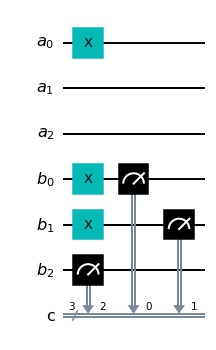

In [4]:
# now we encode the classical sum of a and b onto the qubits
# first of all in classical computation, in order to do the addiction of two integer we write the binary notation
# of those numbers and we perform 'and' operation.
# Then we have to encode the binary notation in quantum computation, and since in quantum computer every qubit starts
# off in the state 0, we need to flip the right qubit (with the x-gate).

qc, r_a, r_b, cr = set_input_state(1,3)
qc.measure(r_b, cr)
qc.draw('mpl')

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc, backend, shots=100)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'011': 100}


### Quantum Fourier Transform (QFT) approach:

In [17]:
from qiskit.circuit.library import QFT

def controlled_rotations(qc, reg_a, reg_b, n):
    for i in range(0, n+1):
        qc.cp(np.pi/2**i, reg_b[n-i], reg_a[n])


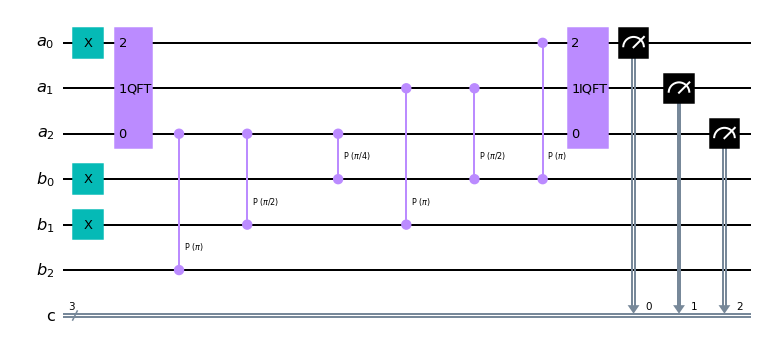

In [18]:
qc, r_a, r_b, cr = set_input_state(1,3)
qc.append(QFT(3, do_swaps=False), [2, 1, 0])

for i in range(0,3):
    controlled_rotations(qc, r_a, r_b, 2-i)

qc.append(QFT(3, do_swaps=False).inverse(), [2, 1, 0]) 
qc.measure(r_a, cr)
qc.draw('mpl')

In [19]:
backend = Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc, backend, shots=100)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'000': 3, '110': 13, '011': 3, '111': 81}
